In [ ]:
! pip install --user matplotlib

# Demo

The sample data are 100 samples from the FordA dataset of the UCR archive:

`Yanping Chen, Eamonn Keogh, Bing Hu, Nurjahan Begum, Anthony Bagnall, Abdullah Mueen and Gustavo Batista (2015). The UCR Time Series Classification Archive. URL www.cs.ucr.edu/~eamonn/time_series_data/`.

In [1]:
import numpy
import random
from matplotlib import pyplot

import os
import sys
sys.path.insert(0, os.path.abspath('../'))
from src.shapelet_candidates import ShapeletCandidateSelection

In [2]:
def plot_LFDPs(x, indices_LFDPs):
    """
    Function to plot LFDPs on top of a sample x.
    """
    lfdps = x[indices_LFDPs]
    fig = pyplot.gcf()
    fig.set_size_inches(23, 6)
    pyplot.title(f'Sample (blue) and corresponding LFDPs ({len(lfdps)} LFDPs)')
    pyplot.plot(x, color="blue")
    pyplot.plot(indices_LFDPs, lfdps, color="orange")
    pyplot.scatter(indices_LFDPs, lfdps, color="brown")
    pyplot.show()


Load the samples:

In [3]:
data = numpy.load(open('fordA_sample.npy', 'rb'))

## Example visualization of LFDPs:

LFDPs can either be identified via an integer that sets the maximum number of LFDPs to identify or via a float which extracts LFDPs until a distance threshold
to the fitting line is surpassed.

Use a number of LFDPs to generate:

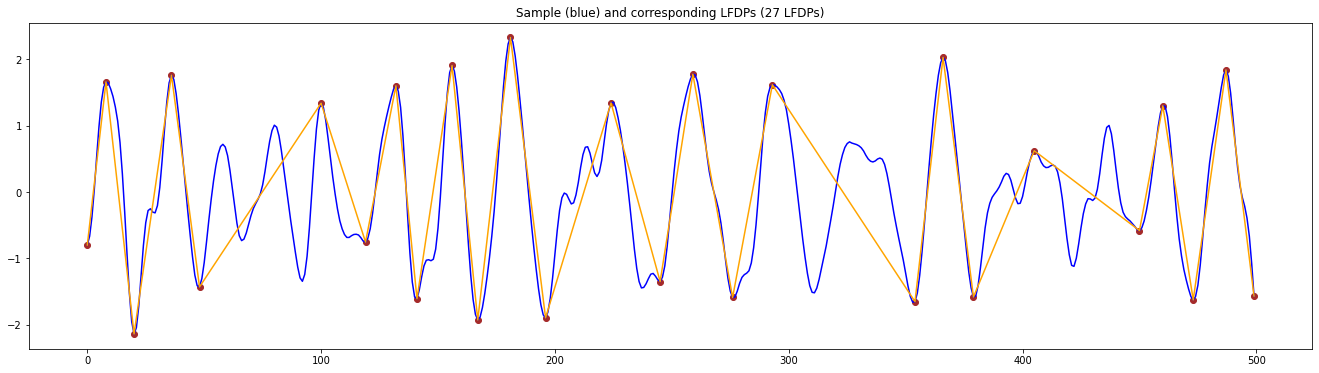

In [4]:
# length_ts * 0.05 + 2 as the number of LFDPs. Empirically tested to
# be good value according to the paper
len_ts = data.shape[1]
# in this case must be an integer
n_lfdp = int(len_ts * 0.05 + 2)
std_split = 1.5
shapelet_selection = ShapeletCandidateSelection(n_lfdp, std_split=1.5)
indices_lfdps = shapelet_selection.identify_LFDPs_of_ts(data[0])
plot_LFDPs(data[0], indices_lfdps)

Use a threshold to generate LFPDs:

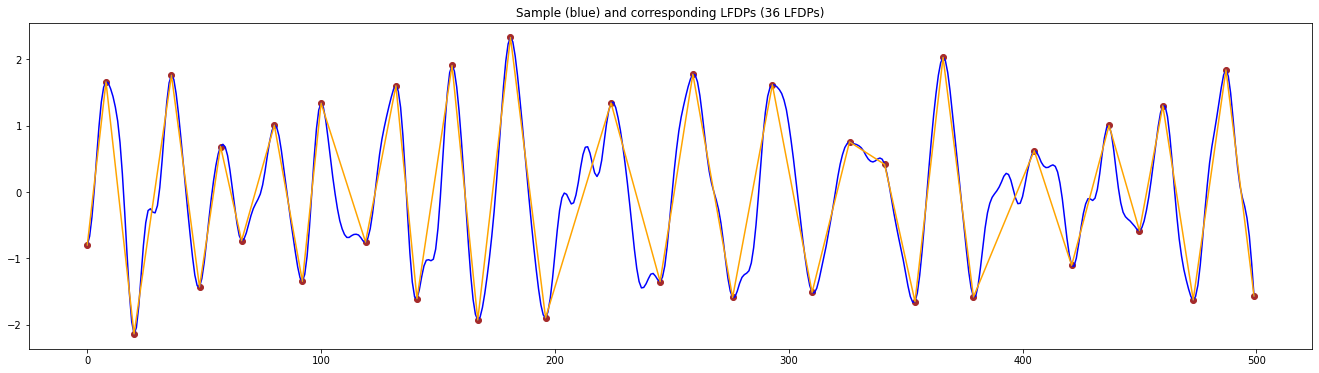

In [5]:
len_ts = data.shape[1]
# in this case must be a float
threshold_dist = 1.0
std_split = 1.5
shapelet_selection = ShapeletCandidateSelection(threshold_dist, std_split=1.5)
indices_lfdps = shapelet_selection.identify_LFDPs_of_ts(data[0])
plot_LFDPs(data[0], indices_lfdps)

## Extract Shapelet Candidates

In [6]:
# length_ts * 0.05 + 2 as the number of LFDPs. Empirically tested to
# be good value according to the paper
len_ts = data.shape[1]
# must be an integer
n_lfdp = int(len_ts * 0.05 + 2)
std_split = 1.5
shapelet_selection = ShapeletCandidateSelection(n_lfdp, std_split=1.5)
shapelet_candidates = shapelet_selection.transform(data)

Visualize 10 of the sampled shapelets:

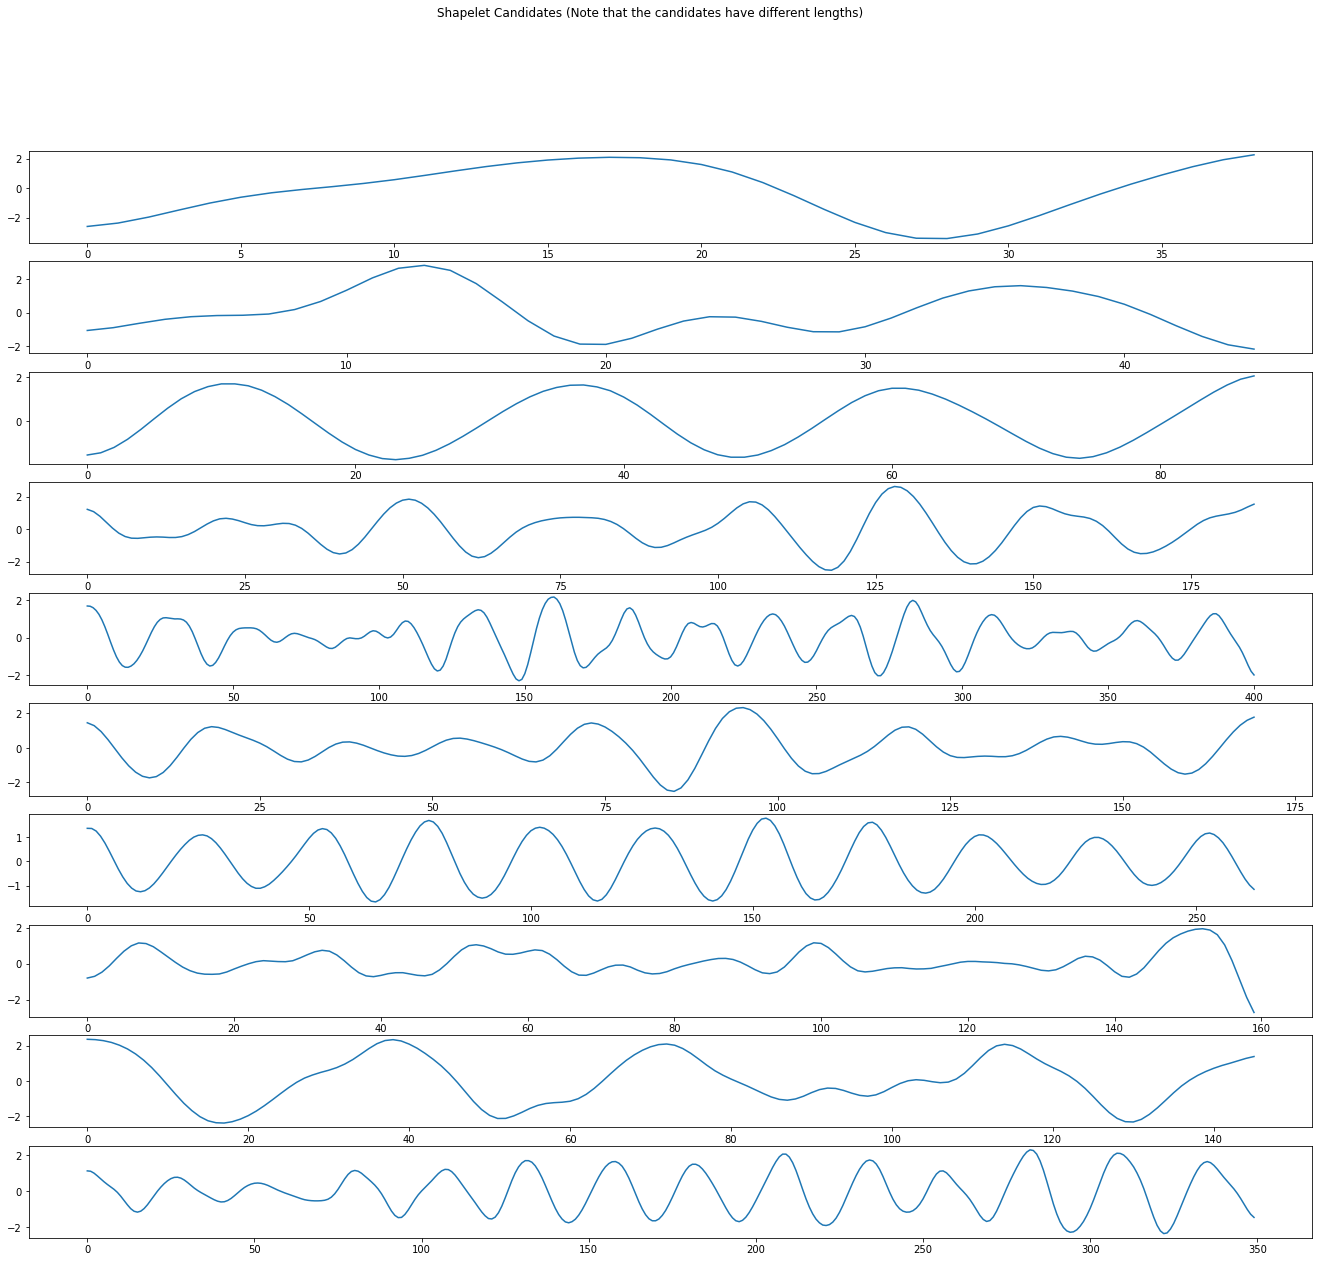

In [7]:
n = 10
fig, axes = pyplot.subplots(n, 1)
fig.suptitle('Shapelet Candidates (Note that the candidates have different lengths)')
fig.set_size_inches(23, n * 2)
for i, x in enumerate(random.sample(shapelet_candidates, 10)):
    axes[i].plot(x) if n > 1 else axes.plot(x)
pyplot.show()